## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [16]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [15]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [22]:
# Combine the data into a single dataset
combine_data = study_results.merge(mouse_metadata, on="Mouse ID")
# Display the data table for preview
combine_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [21]:
# Checking the number of mice.
number_mice = len(combine_data["Mouse ID"].unique())
number_mice

249

In [25]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combine_data["is duplicated"] = combine_data.duplicated(subset=['Mouse ID', 'Timepoint'])
combine_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),is duplicated
0,b128,0,45.000000,0,Capomulin,Female,9,22,False
1,b128,5,45.651331,0,Capomulin,Female,9,22,False
2,b128,10,43.270852,0,Capomulin,Female,9,22,False
3,b128,15,43.784893,0,Capomulin,Female,9,22,False
4,b128,20,42.731552,0,Capomulin,Female,9,22,False
...,...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17,False
1889,m601,30,31.758275,1,Capomulin,Male,22,17,False
1890,m601,35,30.834357,1,Capomulin,Male,22,17,False
1891,m601,40,31.378045,1,Capomulin,Male,22,17,False


In [29]:
# Optional: Get all the data for the duplicate mouse ID. 
combine_data[combine_data["is duplicated"] == True]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),is duplicated
861,g989,0,45.000000,0,Propriva,Female,21,26,True
863,g989,5,47.570392,0,Propriva,Female,21,26,True
865,g989,10,49.880528,0,Propriva,Female,21,26,True
867,g989,15,53.442020,0,Propriva,Female,21,26,True
869,g989,20,54.657650,1,Propriva,Female,21,26,True


In [32]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combine_data[(combine_data["Mouse ID"] != "g989")]
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),is duplicated
0,b128,0,45.000000,0,Capomulin,Female,9,22,False
1,b128,5,45.651331,0,Capomulin,Female,9,22,False
2,b128,10,43.270852,0,Capomulin,Female,9,22,False
3,b128,15,43.784893,0,Capomulin,Female,9,22,False
4,b128,20,42.731552,0,Capomulin,Female,9,22,False
...,...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17,False
1889,m601,30,31.758275,1,Capomulin,Male,22,17,False
1890,m601,35,30.834357,1,Capomulin,Male,22,17,False
1891,m601,40,31.378045,1,Capomulin,Male,22,17,False


In [6]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
#aggregate functions
#https://www.geeksforgeeks.org/python-pandas-dataframe-aggregate/

## Bar and Pie Charts

In [38]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
numb_mice_regimen = clean_data.groupby(["Drug Regimen"]).count()
numb_mice_regimen


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g),is duplicated
Drug Regimen,,,,,,,,
Capomulin,230,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181,181


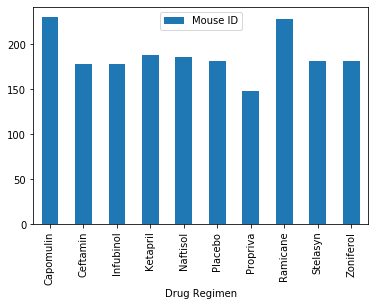

In [39]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
numb_mice_regimen.plot.bar(y="Mouse ID")


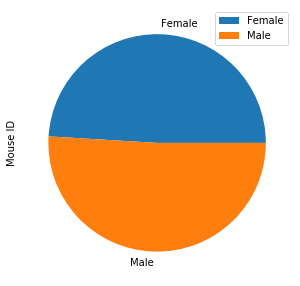

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
number_sex = clean_data.groupby(["Sex"]).count()
number_sex.plot.pie(y="Mouse ID", figsize=(5, 5))

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Male', 'Female'
sizes = [15, 30]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Female')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Quartiles, Outliers and Boxplots

In [43]:
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),is duplicated
0,b128,0,45.000000,0,Capomulin,Female,9,22,False
1,b128,5,45.651331,0,Capomulin,Female,9,22,False
2,b128,10,43.270852,0,Capomulin,Female,9,22,False
3,b128,15,43.784893,0,Capomulin,Female,9,22,False
4,b128,20,42.731552,0,Capomulin,Female,9,22,False
...,...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17,False
1889,m601,30,31.758275,1,Capomulin,Male,22,17,False
1890,m601,35,30.834357,1,Capomulin,Male,22,17,False
1891,m601,40,31.378045,1,Capomulin,Male,22,17,False


In [52]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
final_tumor_vol = clean_data.groupby(["Mouse ID"]).last()

# Capomulin, Ramicane, Infubinol, and Ceftamin
four_drugs = final_tumor_vol.groupby(["Drug Regimen"]).mean()
four_drugs

# Start by getting the last (greatest) timepoint for each mouse
# final_timept = clean what is this?

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge with my clean_data

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g),is duplicated
Drug Regimen,,,,,,
Capomulin,41.000000,36.667568,1.280000,14.040000,20.120000,False
Ceftamin,30.600000,57.753977,1.720000,12.800000,27.400000,False
Infubinol,30.600000,58.178246,1.600000,16.400000,27.320000,False
Ketapril,32.600000,62.806191,1.920000,14.720000,28.080000,False
Naftisol,32.200000,61.205757,2.000000,12.240000,27.240000,False
Placebo,31.200000,60.508414,2.080000,10.680000,28.040000,False
Propriva,25.833333,56.493884,1.541667,9.416667,27.291667,False
Ramicane,40.600000,36.191390,1.200000,10.840000,20.000000,False
Stelasyn,32.708333,61.001707,1.458333,13.125000,27.875000,False


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
matplotlib.pyplot.boxplot(data, notch=None, vert=None, patch_artist=None, widths=None)

## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
